In [1]:
from heeps.util.img_processing import get_radial_profile
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder = '/Users/cdelacroix/Desktop/znse_artemis'
files = ['20230609_130102.fits',
         '20230609_130106.fits',
         '20230609_130110.fits',
         '20230609_130141.fits',
         '20230609_130145.fits',
         '20230609_130149.fits',
         '20230609_130211.fits',
         '20230609_130215.fits',
         '20230609_130219.fits']
xoyo = (75, 75)
xmax = 50
part = '001'

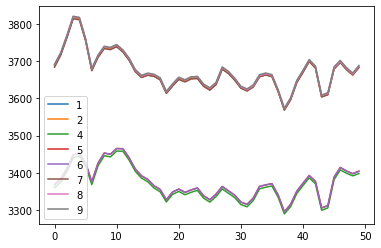

In [3]:
y = np.empty((len(files),xmax))
data = np.empty((len(files),150,150))
for i,file in enumerate(files):
    data[i] = fits.getdata(folder + '/' + file)
    y[i] = get_radial_profile(data[i], xoyo, nbin=1)[:xmax]
    #plt.plot(y[:xmax], label=i+1)
    if i+1 in [1,2,4,5,6,7,8,9]:#[3,5,7]:
        plt.plot(y[i], label=i+1)
    
plt.legend();
#plt.yscale('log')

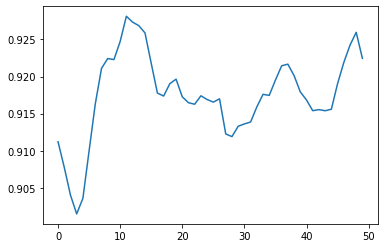

In [4]:
plt.plot(y[3]/y[0]);
plt.savefig('radial_trans_%s.png'%part)

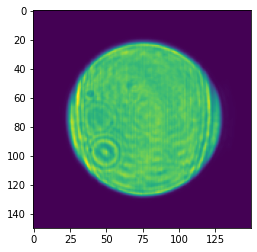

In [5]:
plt.imshow(data[3]);

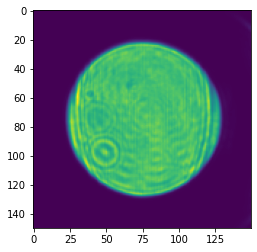

In [6]:
plt.imshow(data[0]);

/Users/cdelacroix/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


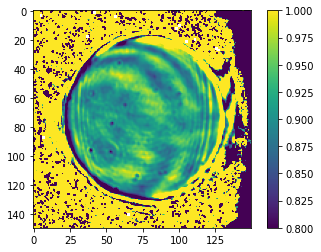

In [7]:
plt.imshow(data[3]/data[0],vmin=0.8,vmax=1);
plt.colorbar();
plt.savefig('part_%s.png'%part)